# Effect of smoothed contact

## Imports

In [1]:
import time
import os
import numpy as np

from pydrake.all import (PiecewisePolynomial, ModelInstanceIndex,
    RotationMatrix, RigidTransform, Rgba, Box, Sphere, BaseField,
    Evaluate, Fields, PointCloud, MeshcatAnimation)

from qsim.parser import (
    QuasistaticParser,
    QuasistaticSystemBackend,
    GradientMode,
)

from qsim.simulator import ForwardDynamicsMode, InternalVisualizationType
from qsim.model_paths import models_dir, package_paths_dict

import matplotlib.pyplot as plt

/home/shaoyuan/Documents/Software/quasistatic_simulator/robotics_utilities/qp_derivatives/qp_derivatives.py:2: DrakeDeprecationWarning: Please import from the pydrake.solvers module directly, instead of the deprecated pydrake.solvers.mathematicalprogram submodule. The deprecated code will be removed from Drake on or after 2023-05-01.
  import pydrake.solvers.mathematicalprogram as mp


## Initialize Quasistatic Simulator

In [2]:
# q_model_path = os.path.join(models_dir, "q_sys", "box_pushing.yml")
package_paths_dict["dccm_quasistatic"] =  "/home/shaoyuan/Documents/Software/dccm_quasistatic"
q_model_path = os.path.join("../../models", "q_sys", "box_pushing.yml")
q_parser = QuasistaticParser(q_model_path)
q_sim = q_parser.make_simulator_cpp()
q_sim_py = q_parser.make_simulator_py(InternalVisualizationType.Cpp)
q_sim_batch = q_parser.make_batch_simulator()

INFO:drake:Meshcat listening for connections at http://localhost:7002


In [3]:
# This trajectory is s_r is not large enough

sim_params = q_sim.get_sim_params_copy()
sim_params.h =0.1
sim_params.use_free_solvers = False
sim_params.gradient_mode = GradientMode.kAB
sim_params.forward_mode = ForwardDynamicsMode.kLogIcecream
sim_params.unactuated_mass_scale = 10
sim_params.log_barrier_weight = 10


Running that desired trajectory open loop

In [18]:
plt.rcParams.update({'font.size': 40})

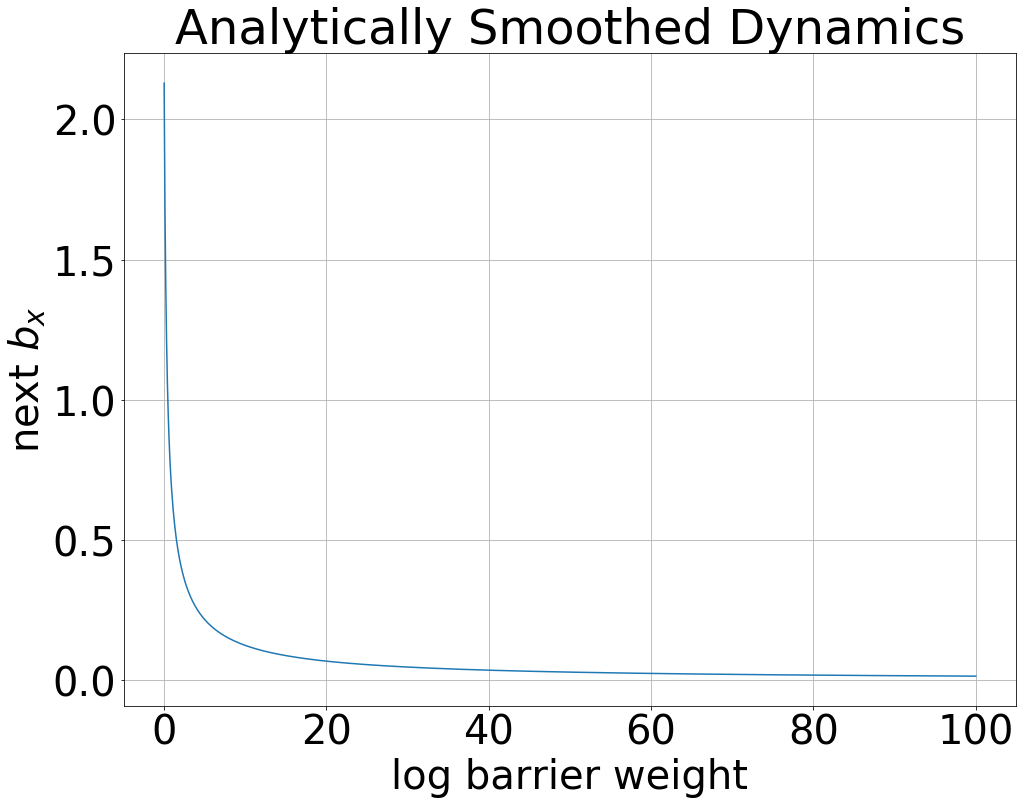

In [20]:
final_pos = []
log_barrier_weights = np.linspace(0,100, 1000)
for lbw in log_barrier_weights:
    q_u = np.array([0, 0, 0])
    q_a = np.array([-1, 0])
    q = np.concatenate((q_u, q_a)) # [box_x, box_y, box_theta, sphere_x, sphere_y]
    u = q_a
    # q_sim_py.update_mbp_positions_from_vector(q)
    # q_sim_py.draw_current_configuration()
    sim_params.log_barrier_weight = lbw
    q_next = q_sim.calc_dynamics(q, u, sim_params)
    final_pos.append(q_next[:3])
    # A = q_sim.get_Dq_nextDq()
    # B = q_sim.get_Dq_nextDqa_cmd()

plt.plot(log_barrier_weights, np.array(final_pos)[:,0])
# Label x axis
plt.xlabel('log barrier weight')
plt.ylabel(r'next $b_x$')
plt.title("Analytically Smoothed Dynamics")
plt.grid()
# Set size of the figure
plt.gcf().set_size_inches(16, 12)
# set font size of the title

plt.show()